In [39]:
!pip install -q kaggle # install kaggle api client

In [40]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: kaggle.json: No such file or directory


In [41]:
!chmod 600 ~/.kaggle/kaggle.json


chmod: /Users/yatharthdangi/.kaggle/kaggle.json: No such file or directory


In [42]:
!kaggle datasets list
!kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset

/Users/yatharthdangi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Traceback (most recent call last):
  File "/Users/yatharthdangi/Library/Python/3.9/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/Users/yatharthdangi/Library/Python/3.9/lib/python/site-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/Users/yatharthdangi/Library/Python/3.9/lib/python/site-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /Users/yatharthdangi/.kaggle. Or use the environment method.
/Users/yatharthdangi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: ur

In [43]:
!unzip online-payments-fraud-detection-dataset.zip

Archive:  online-payments-fraud-detection-dataset.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load dataset

In [45]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [46]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


eda

In [47]:
df["nameOrig_type"]=df["nameOrig"].str[:1]

In [48]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_type
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,C
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,C
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,C
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,C
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,C
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,C
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,C
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,C


In [49]:
df=df.drop(columns=["nameOrig","nameOrig_type"])

In [50]:
df["nameDest_type"]=df["nameDest"].str[:1]

In [51]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_type
0,1,PAYMENT,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0,0,M
1,1,PAYMENT,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0,0,M
2,1,TRANSFER,181.00,181.00,0.00,C553264065,0.00,0.00,1,0,C
3,1,CASH_OUT,181.00,181.00,0.00,C38997010,21182.00,0.00,1,0,C
4,1,PAYMENT,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0,0,M
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,C776919290,0.00,339682.13,1,0,C
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00,1,0,C
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,C
6362618,743,TRANSFER,850002.52,850002.52,0.00,C2080388513,0.00,0.00,1,0,C


one hot encoding


In [52]:
one_hot = pd.get_dummies(df[['nameDest_type', 'type']]) # Select multiple columns using a list within square brackets
df = df.drop(["nameDest_type", "type"], axis=1) # Pass columns to drop as a list
df = df.join(one_hot)

In [53]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_type_C,nameDest_type_M,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,True,False,False,False,True,False
1,1,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,True,False,False,False,True,False
2,1,181.00,181.00,0.00,C553264065,0.00,0.00,1,0,True,False,False,False,False,False,True
3,1,181.00,181.00,0.00,C38997010,21182.00,0.00,1,0,True,False,False,True,False,False,False
4,1,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,C776919290,0.00,339682.13,1,0,True,False,False,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00,1,0,True,False,False,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,True,False,False,True,False,False,False
6362618,743,850002.52,850002.52,0.00,C2080388513,0.00,0.00,1,0,True,False,False,False,False,False,True


In [54]:
df = df.drop(["nameDest"], axis=1)

normalization

In [55]:
def norm_column(df,col):
  df[col]=(df[col]-df[col].min())/(df[col].max()-df[col].min())


In [56]:
norm_cols=[
    "step",
    "amount",
    "oldbalanceOrg",
    "newbalanceOrig",
    "oldbalanceDest",
    "newbalanceDest"
]

In [57]:
for col in norm_cols:
  norm_column(df,col)

In [58]:
df_isFraud=df[df["isFraud"]==1]
df_isnotFraud=df[df["isFraud"]==0]


In [59]:
df_isFraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_type_C,nameDest_type_M,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2,0.0,0.000002,0.000003,0.0,0.000000,0.000000,1,0,True,False,False,False,False,False,True
3,0.0,0.000002,0.000003,0.0,0.000059,0.000000,1,0,True,False,False,True,False,False,False
251,0.0,0.000030,0.000047,0.0,0.000000,0.000000,1,0,True,False,False,False,False,False,True
252,0.0,0.000030,0.000047,0.0,0.000074,0.000000,1,0,True,False,False,True,False,False,False
680,0.0,0.000218,0.000338,0.0,0.000000,0.000000,1,0,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.0,0.000000,0.000954,1,0,True,False,False,True,False,False,False
6362616,1.0,0.068272,0.105923,0.0,0.000000,0.000000,1,0,True,False,False,False,False,False,True
6362617,1.0,0.068272,0.105923,0.0,0.000192,0.017912,1,0,True,False,False,True,False,False,False
6362618,1.0,0.009195,0.014265,0.0,0.000000,0.000000,1,0,True,False,False,False,False,False,True


undersampling(balancing)

In [60]:
df_isnotfraud=df_isnotFraud.sample(n=8213, random_state=42)

In [61]:
df_isnotfraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_type_C,nameDest_type_M,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
1777056,0.216981,0.001988,0.000325,0.000000,0.001075,0.001590,0,0,True,False,False,True,False,False,False
1350600,0.183288,0.000006,0.000000,0.000000,0.000000,0.000000,0,0,False,True,False,False,False,True,False
1991933,0.239892,0.000038,0.000333,0.000330,0.000000,0.000000,0,0,False,True,False,False,False,True,False
5092368,0.477089,0.000019,0.000097,0.000082,0.000000,0.000000,0,0,False,True,False,False,False,True,False
5066515,0.475741,0.002738,0.022296,0.031897,0.007621,0.006907,0,0,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779354,0.450135,0.002875,0.000000,0.000000,0.002527,0.003272,0,0,True,False,False,True,False,False,False
1913121,0.222372,0.002020,0.000003,0.003769,0.000000,0.000000,0,0,True,False,True,False,False,False,False
1989584,0.239892,0.001482,0.000000,0.000000,0.003203,0.003586,0,0,True,False,False,True,False,False,False
3085033,0.315364,0.000107,0.004805,0.005573,0.000000,0.000000,0,0,False,True,False,False,False,True,False


In [62]:
df=pd.concat([df_isFraud,df_isnotfraud])

In [63]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_type_C,nameDest_type_M,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2,0.000000,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,True,False,False,False,False,False,True
3,0.000000,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,True,False,False,True,False,False,False
251,0.000000,0.000030,0.000047,0.000000,0.000000,0.000000,1,0,True,False,False,False,False,False,True
252,0.000000,0.000030,0.000047,0.000000,0.000074,0.000000,1,0,True,False,False,True,False,False,False
680,0.000000,0.000218,0.000338,0.000000,0.000000,0.000000,1,0,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779354,0.450135,0.002875,0.000000,0.000000,0.002527,0.003272,0,0,True,False,False,True,False,False,False
1913121,0.222372,0.002020,0.000003,0.003769,0.000000,0.000000,0,0,True,False,True,False,False,False,False
1989584,0.239892,0.001482,0.000000,0.000000,0.003203,0.003586,0,0,True,False,False,True,False,False,False
3085033,0.315364,0.000107,0.004805,0.005573,0.000000,0.000000,0,0,False,True,False,False,False,True,False


In [64]:
# prompt: split data

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (13140, 14)
y_train shape: (13140,)
X_test shape: (3286, 14)
y_test shape: (3286,)


In [65]:
import lightgbm as lgb
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
clf = lgb.LGBMClassifier()

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
X_pred=clf.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_test = accuracy_score(y_test,y_pred)
print('\naccuracy_score on test dataset : ', accuracy_test)
precision_test = precision_score(y_test,y_pred)
print('\nprecision_score on test dataset : ', precision_test)
accuracy_test = accuracy_score(y_train,X_pred)
print('\naccuracy_score on train dataset : ', accuracy_test)
recall_test = recall_score(y_test,y_pred)
print('\nrecall_score on test dataset : ', recall_test)


[LightGBM] [Info] Number of positive: 6564, number of negative: 6576
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1544
[LightGBM] [Info] Number of data points in the train set: 13140, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499543 -> initscore=-0.001826
[LightGBM] [Info] Start training from score -0.001826

accuracy_score on test dataset :  0.9933049300060864

precision_score on test dataset :  0.9903556359252562

accuracy_score on train dataset :  1.0

recall_score on test dataset :  0.9963614311704063


confusion metrix

[Text(0.5, 0, '0'), Text(1.5, 0, '1')]

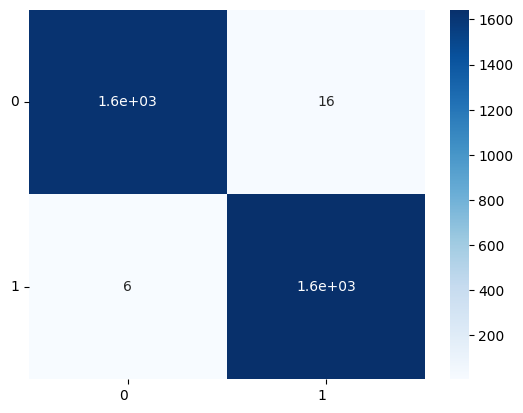

In [66]:
from sklearn.metrics import confusion_matrix
conmat = confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
val = np.mat(conmat)

classnames = list(set(y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames,

    )

import seaborn as sns

plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')

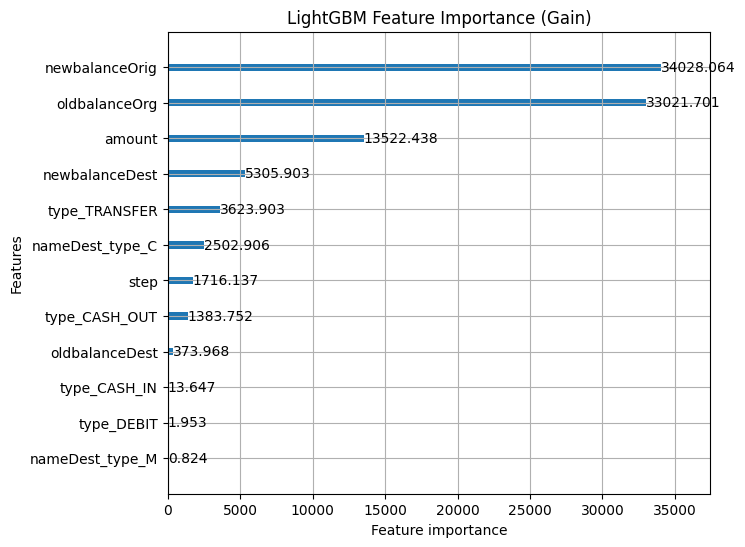

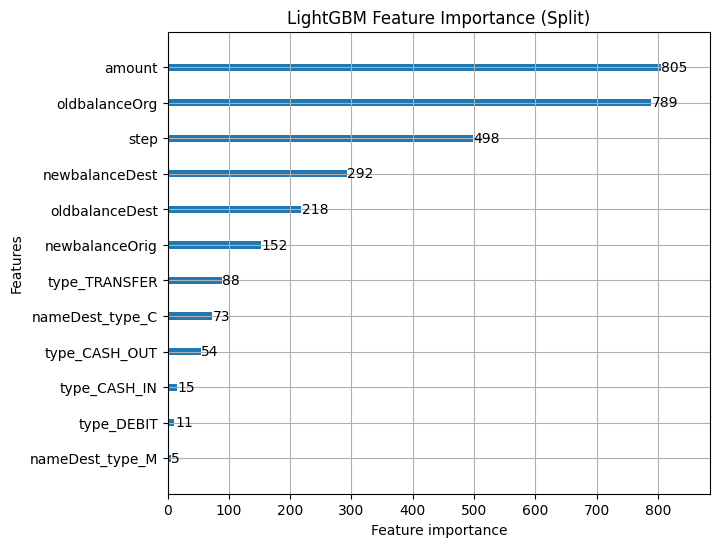

In [67]:
# plot

from matplotlib import pyplot as plt
# Plot feature importance using Gain
lgb.plot_importance(clf, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain)")
plt.show()
# Plot feature importance using Split
lgb.plot_importance(clf, importance_type="split", figsize=(7,6), title="LightGBM Feature Importance (Split)")
plt.show()


Defaulting to user installation because normal site-packages is not writeable


/Users/yatharthdangi/Library/Python/3.9/lib/python/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


CPU times: user 979 ms, sys: 5.85 ms, total: 984 ms
Wall time: 195 ms


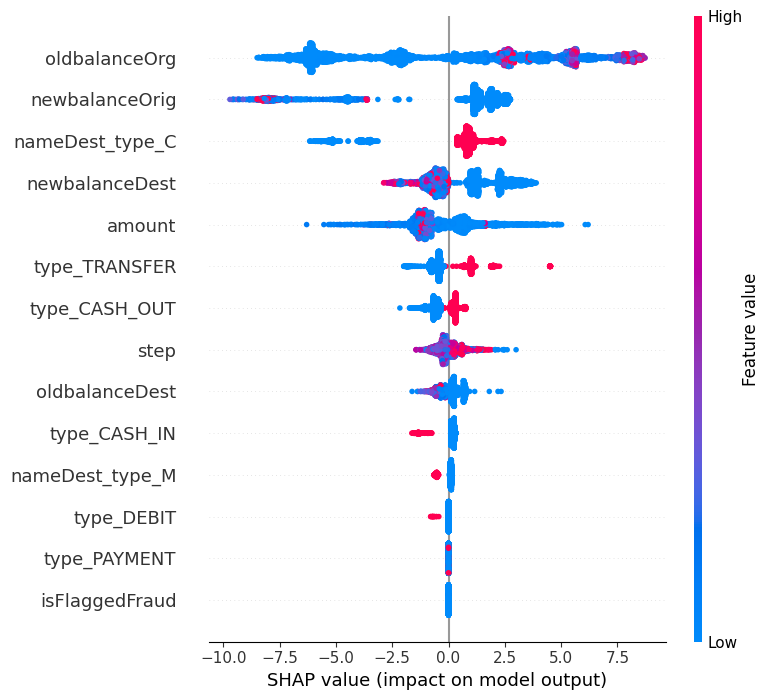

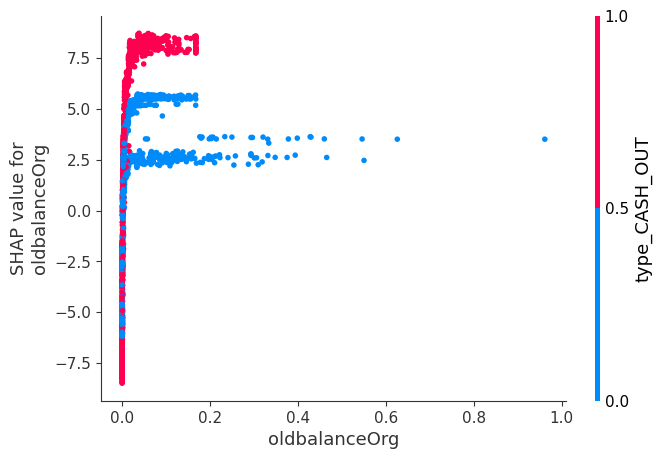

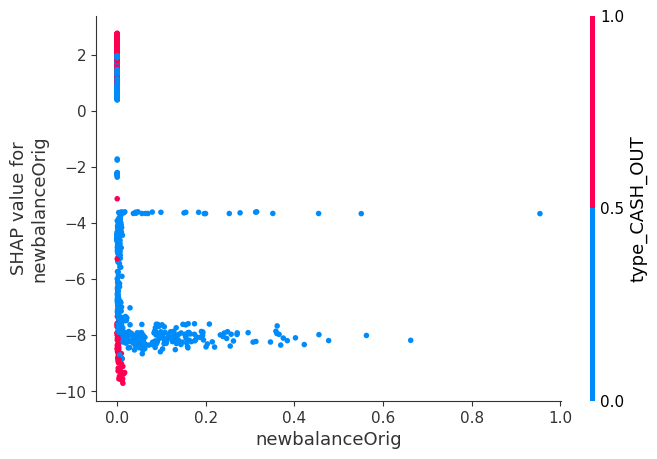

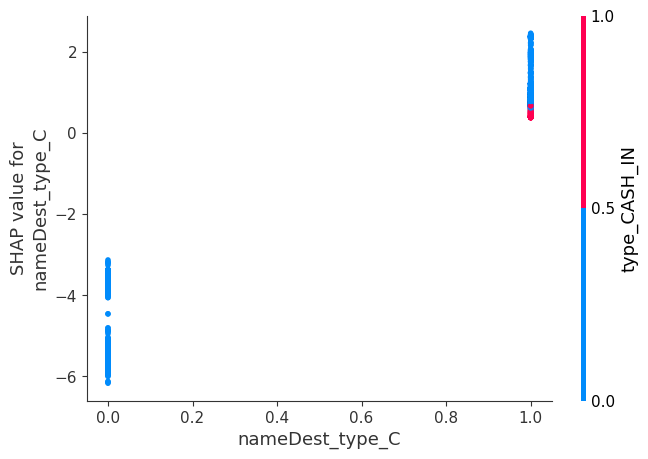

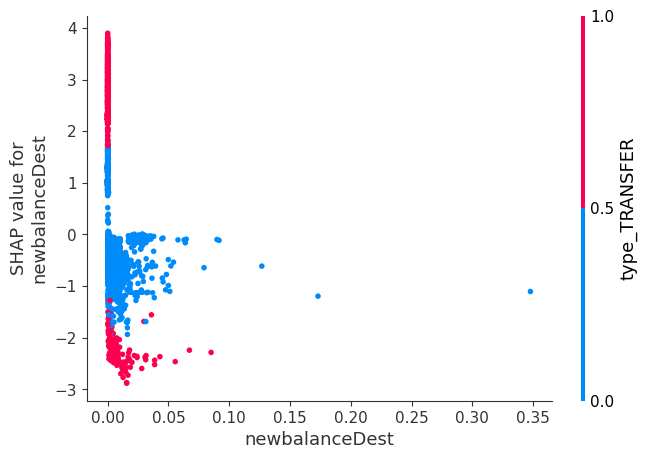

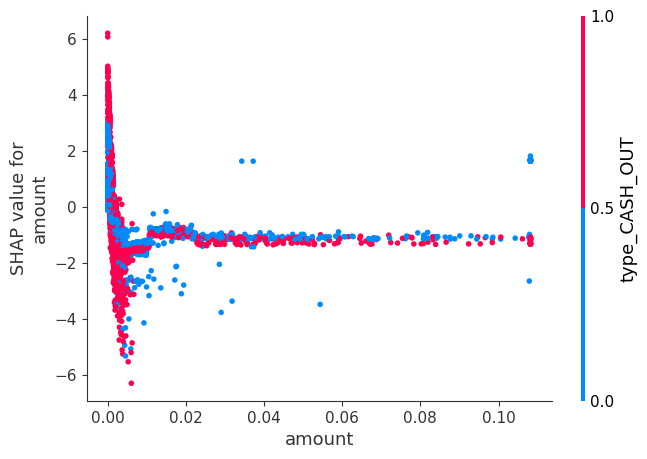

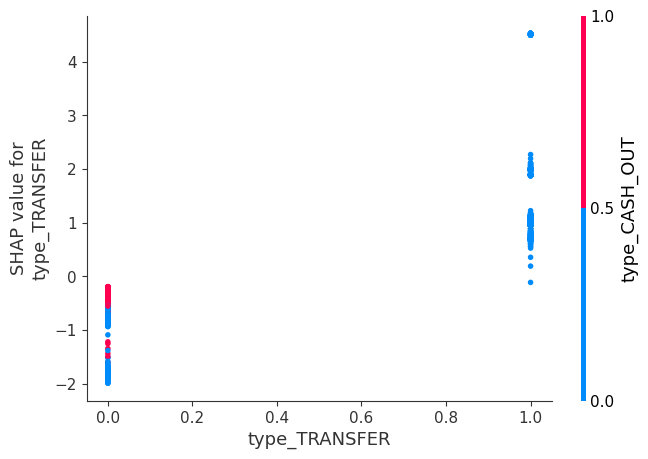

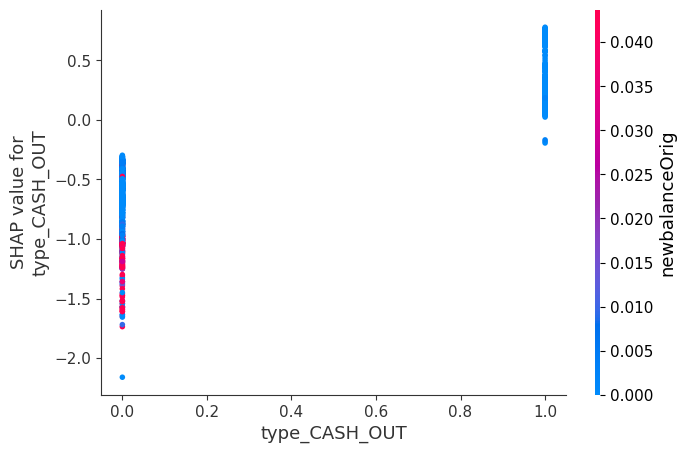

In [68]:
!pip install shap
import shap
%time shap_values = shap.TreeExplainer(clf).shap_values(X_test)
shap.summary_plot(shap_values, X_test)
shap.dependence_plot("oldbalanceOrg", shap_values, X_test)
shap.dependence_plot("newbalanceOrig", shap_values,X_test )
shap.dependence_plot("nameDest_type_C", shap_values,X_test)
shap.dependence_plot("newbalanceDest", shap_values,X_test)
shap.dependence_plot("amount", shap_values,X_test)
shap.dependence_plot("type_TRANSFER", shap_values,X_test)
shap.dependence_plot("type_CASH_OUT", shap_values,X_test)

In [69]:
import joblib

# Specify the file path where you want to save the model
model_path = 'model.pkl'

# Save the model to the specified file path
joblib.dump(clf, model_path)


['model.pkl']